<a href="https://colab.research.google.com/github/nataliepham6720/16-745_Optimal_Control/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

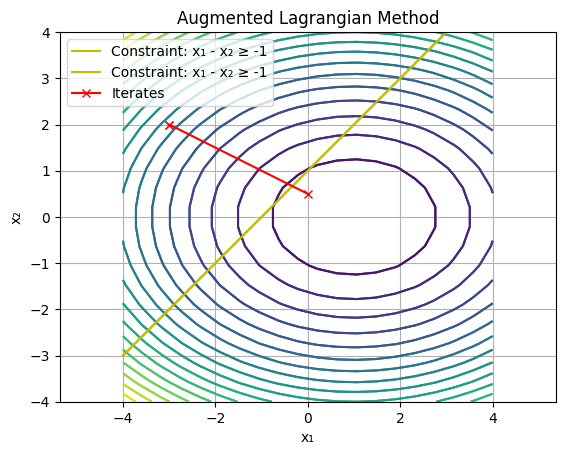

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------
# Define objective and its derivatives
# -----------------------------------
Q = np.diag([0.5, 1.0])
x_star = np.array([1.0, 0.0])

def f(x):
    x = np.asarray(x)
    return 0.5 * (x - x_star).T @ Q @ (x - x_star)

def grad_f(x):
    return Q @ (x - x_star)

def hess_f(x):
    return Q

# -----------------------------------
# Define constraint and its gradient
# -----------------------------------
A = np.array([1.0, -1.0])
b = -1.0

def c(x):
    return A @ x - b

def dc(x):
    return A.reshape(1, -1)  # shape (1, 2)

# -----------------------------------
# Plot landscape with constraint
# -----------------------------------
def plot_landscape():
    Nsamp = 20
    Xsamp, Ysamp = np.meshgrid(np.linspace(-4, 4, Nsamp), np.linspace(-4, 4, Nsamp))
    Zsamp = np.zeros_like(Xsamp)
    for j in range(Nsamp):
        for k in range(Nsamp):
            Zsamp[j, k] = f(np.array([Xsamp[j, k], Ysamp[j, k]]))
    plt.contour(Xsamp, Ysamp, Zsamp, levels=20)

    xc = np.linspace(-4, 3, Nsamp)
    yc = xc + 1
    plt.plot(xc, yc, 'y', label='Constraint: x₁ - x₂ ≥ -1')
    plt.axis('equal')

# -----------------------------------
# Augmented Lagrangian (for plotting/debug)
# -----------------------------------
def La(x, λ, ρ):
    p = max(0, c(x))
    return f(x) + λ * p + 0.5 * ρ * p**2

# -----------------------------------
# Newton solver for equality-constrained step
# -----------------------------------
def newton_solve(x0, λ, ρ):
    x = np.array(x0)
    while True:
        p = max(0.0, c(x))
        if c(x) >= 0:
            C = dc(x)
        else:
            C = np.zeros((1, 2))

        g = grad_f(x) + (λ + ρ * p) * C.T.flatten()
        if np.linalg.norm(g) < 1e-8:
            break
        H = hess_f(x) + ρ * (C.T @ C)
        Δx = -np.linalg.solve(H, g)
        x = x + Δx
    return x

# -----------------------------------
# Run ALM steps
# -----------------------------------
xguess = [np.array([-3.0, 2.0])]
λguess = [0.0]
ρ = 1.0

plot_landscape()
plt.plot(xguess[-1][0], xguess[-1][1], "rx")

# Run one ALM step
xnew = newton_solve(xguess[-1], λguess[-1], ρ)
λnew = max(0.0, λguess[-1] + ρ * c(xnew))
xguess.append(xnew)
λguess.append(λnew)
ρ *= 10

# Plot result
plot_landscape()
xs = np.array(xguess)
plt.plot(xs[:, 0], xs[:, 1], "rx-", label="Iterates")
plt.legend()
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Augmented Lagrangian Method")
plt.grid(True)
plt.show()
